# Proof of Concept

Starting off our network analysis of product launches with the Chuck 2 product launch. Attempting to create a 'retweet network' to help Converse understand how, during product launches, their major influencers are helping them capture new demographics

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import csv

df_posts = pd.read_csv('Postsfrom2015-07-23cs.csv')

In [3]:
df_posts

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following
0,626110419262906369,7/28/15 15:22,http://twitter.com/Tonif08/status/626110419262...,@wawraaaa shoe person. Where can I buy the chu...,@Tonif08,Toni Fersanchez,NaN,NaN,NaN,Basic Neutral,NaN,Twitter,36.0,NaN,1050.0,227.0,418.0
1,625626850786705408,7/27/15 7:20,http://twitter.com/nietsebastiaan/status/62562...,RT @Kyle_JSimmons @bastilledan you seen the ne...,@nietsebastiaan,Bastian Vogelvanger,NaN,NaN,NaN,Basic Neutral,NaN,Twitter,17.0,M,110.0,3.0,17.0
2,0c17f43f-d5dd-4361-8881-a26eb1c13f06,7/24/15 15:20,http://www.bazarpop.com.br/blog/2015/07/24/con...,Prepare-se para calçar o melhor All Star de to...,NaN,NaN,Brazil,NaN,NaN,Basic Positive,NaN,Blogs,NaN,NaN,NaN,NaN,NaN
3,626751725832024064,7/30/15 9:50,http://twitter.com/m_meaning/status/6267517258...,RT @noranartta Converse เผยภาพ Chuck Taylor Al...,@m_meaning,มีน.,Thailand,Central,Bangkok,NaN,NaN,Twitter,43.0,NaN,26522.0,239.0,198.0
4,631049795533062144,8/11/15 6:29,http://twitter.com/high_linly/status/631049795...,RT @Girldailydotcom Chuck Taylor II รองเท้าดีไ...,@high_linly,ศรีมอยส์,Russia,Siberian,Novosibirsk,NaN,NaN,Twitter,20.0,NaN,10437.0,46.0,547.0
5,624926711445106688,7/25/15 8:58,http://twitter.com/Enjoyableart/status/6249267...,Chuck Taylor All Star II http://t.co/IxcXSijtVH,@Enjoyableart,Antonio Argolo,Brazil,NaN,NaN,Basic Neutral,NaN,Twitter,20.0,M,1655.0,142.0,479.0
6,124939579511,7/24/15 15:17,http://magicisthebestandihavemagic.tumblr.com/...,"<p><a href=""http://micdotcom.tumblr.com/post/1...",magicisthebestandihavemagic,NaN,NaN,NaN,NaN,Basic Neutral,NaN,Tumblr,NaN,NaN,NaN,NaN,NaN
7,625659276439240708,7/27/15 9:29,http://twitter.com/xthedraw/status/62565927643...,RT @Kyle_JSimmons @bastilledan you seen the ne...,@xthedraw,hannibolla,NaN,NaN,NaN,Basic Neutral,NaN,Twitter,31.0,NaN,6749.0,204.0,127.0
8,125616594216,8/1/15 16:09,http://everyones-misspent-youth.tumblr.com/pos...,NaN,everyones-misspent-youth,NaN,NaN,NaN,NaN,NaN,NaN,Tumblr,NaN,NaN,NaN,NaN,NaN
9,624650591818674177,7/24/15 14:41,http://twitter.com/Nice_Jewish_Boy/status/6246...,a great shoe gets better? Unveiling Chuck Tayl...,@Nice_Jewish_Boy,"MJ, a NJB",United States of America,NaN,NaN,Basic Neutral,NaN,Twitter,56.0,NaN,42649.0,1145.0,1016.0


In [66]:
import string

tweets = df_posts['Contents']

# Substring to indicate we have a retweet from Riker
riker_RT = 'RT @rikerR5'

indices = []
i = 0
for tweet in tweets:
    tweet = str(tweet)
    if riker_RT in tweet:
        indices.append(i)
    
    i += 1
    
df_riker_RT = df_posts.iloc[indices]
df_riker_RT = df_riker_RT.reset_index()
del df_riker_RT['index']

In [67]:
df_riker_RT

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following
0,625401286146461696,7/26/15 16:24,http://twitter.com/LauraSusey/status/625401286...,RT @rikerR5 Cannot wait to get a pair of these...,@LauraSusey,Laura Esparza,NaN,NaN,NaN,Basic Positive,NaN,Twitter,27.0,F,16530.0,77.0,122.0
1,625385081100738561,7/26/15 15:19,http://twitter.com/rikerspotato/status/6253850...,RT @rikerR5 Cannot wait to get a pair of these...,@rikerspotato,praying r5 26 sept,NaN,NaN,NaN,Basic Positive,NaN,Twitter,41.0,NaN,10122.0,309.0,246.0
2,625385035395395584,7/26/15 15:19,http://twitter.com/tyranda_shyanne/status/6253...,RT @rikerR5 Cannot wait to get a pair of these...,@tyranda_shyanne,Tyranda,United States of America,North Carolina,NaN,Basic Positive,NaN,Twitter,29.0,NaN,3839.0,143.0,340.0
3,625385036964044801,7/26/15 15:19,http://twitter.com/MovElTotoCarter/status/6253...,RT @rikerR5 Cannot wait to get a pair of these...,@MovElTotoCarter,#CalibraskaEP,Argentina,Ciudad de Buenos Aires,Buenos Aires,Basic Positive,NaN,Twitter,NaN,NaN,8386.0,1522.0,2002.0
4,625387885710155776,7/26/15 15:31,http://twitter.com/luvRossLynch1st/status/6253...,RT @rikerR5 Cannot wait to get a pair of these...,@luvRossLynch1st,Ashlyn Lynch,United States of America,NaN,NaN,Basic Positive,NaN,Twitter,16.0,F,3124.0,18.0,40.0
5,625385210708934656,7/26/15 15:20,http://twitter.com/LedesmaYessenia/status/6253...,RT @rikerR5 Cannot wait to get a pair of these...,@LedesmaYessenia,R5FAMILY❤,NaN,NaN,NaN,Basic Positive,NaN,Twitter,41.0,NaN,3193.0,1208.0,2001.0
6,625398479045697536,7/26/15 16:13,http://twitter.com/ImaniJ_22/status/6253984790...,RT @rikerR5 Cannot wait to get a pair of these...,@ImaniJ_22,Imani Jones,United States of America,Texas,NaN,Basic Positive,NaN,Twitter,20.0,F,5111.0,247.0,418.0
7,625385111647879168,7/26/15 15:20,http://twitter.com/DivaStyles94/status/6253851...,RT @rikerR5 Cannot wait to get a pair of these...,@DivaStyles94,#5YearsOneDirection,United States of America,NaN,NaN,Basic Positive,NaN,Twitter,42.0,NaN,7728.0,2075.0,1992.0
8,625404981214994432,7/26/15 16:39,http://twitter.com/NayeLynchR5/status/62540498...,RT @rikerR5 Cannot wait to get a pair of these...,@NayeLynchR5,Naye G,United States of America,California,NaN,Basic Positive,NaN,Twitter,31.0,NaN,3544.0,279.0,350.0
9,625385091657658368,7/26/15 15:19,http://twitter.com/Emmie8800/status/6253850916...,RT @rikerR5 Cannot wait to get a pair of these...,@Emmie8800,Emmie,United States of America,NaN,NaN,Basic Positive,NaN,Twitter,22.0,F,1142.0,63.0,710.0


# Create a Quick 1-Level Graph from this Crimson Hexagon Data

Allows us to visualize the impact a power user like Riker had during the product launch of the Chuck 2's

In [116]:
import matplotlib.pyplot as plt

G = nx.Graph()

for user in df_riker_RT['Author']:
    G.add_edge("@rikerR5",str(user))
    

#G['@rikerR5']['color'] = 'blue'
nx.draw(G)

giant = max(nx.connected_component_subgraphs(G), key=len)
center_nodes = nx.center(giant)
print(center_nodes)

['@rikerR5']


In [120]:
G.nodes() == '@rikerR5'

False

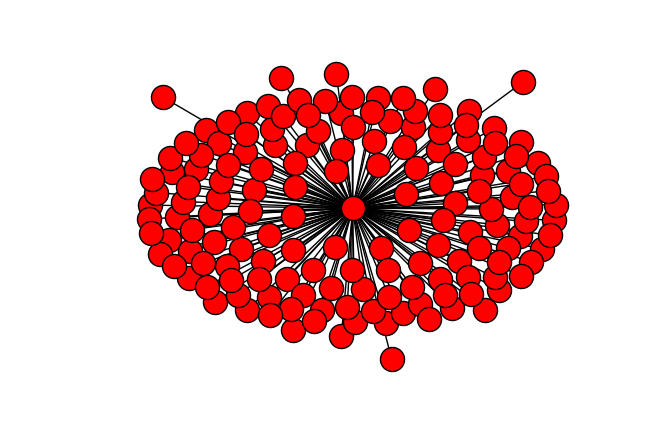

In [110]:
plt.show()

# Scrape Twitter to get Second Degree

Getting the second ... nth level users to see the breadth of network our giant created